<a href="https://colab.research.google.com/github/GSelvakumar/ml/blob/main/Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Notebook imports and Packages

In [17]:
import matplotlib.pyplot as plt
import numpy as np

**EXAMPLE 1 => A SIMPLE COST FUNCTION**

$f(x) = x^2 + x + 1$

In [18]:
def f(x):
  return x**2 + x + 1

In [19]:
x1 = np.linspace(start=-3, stop= 3, num= 500)


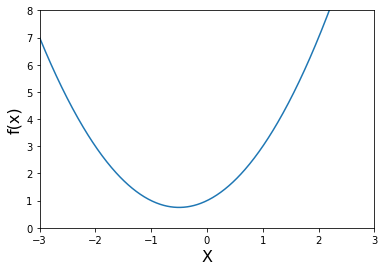

In [20]:
#Plot

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1))
plt.show()

Derivative of function ($f(x) = x^2 + x + 1$)  is  $df(x)$ which is $2x + 1$

In [21]:
def df(x):
  return 2*x + 1

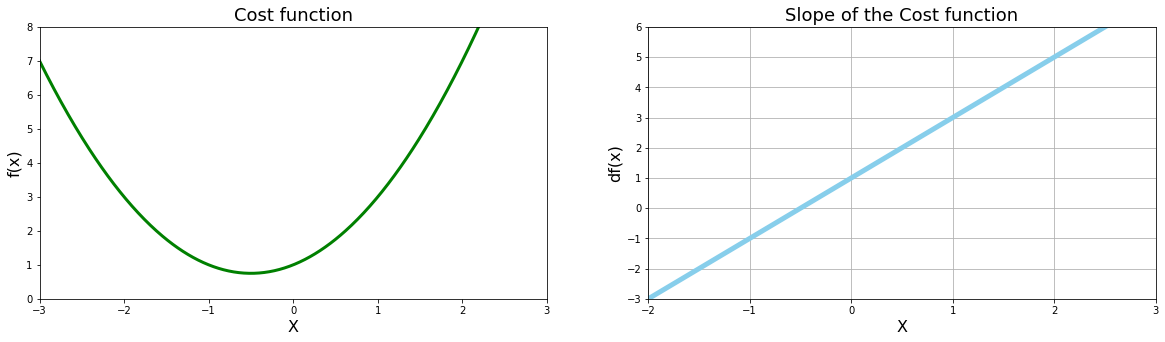

In [22]:
#Plot function and derivaties side by side

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)
plt.plot(x1, f(x1), color='green', linewidth=3)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.plot(x1, df(x1), color='skyblue', linewidth=5)

plt.show()

##Gradient Descent

It is the optimization algorithm for finding the minimum of the function.

In [23]:
new_x = 3
previous_x = 0 #temporary variable
step_multiplier = 0.1 #learning rate or gamma
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
  previous_x = new_x
  gradient = df(previous_x)
  new_x = previous_x - step_multiplier * gradient # minus sign indicates that going steep down towards the gradient 

  step_size = abs(new_x - previous_x)

  x_list.append(new_x)
  slope_list.append(df(new_x))

  if step_size < precision:
    print("loop ran this many times:", n)
    break

print("Local minimum occurs at: ", new_x)
print("Slope or df(x) value at this point is: ",df(new_x))
print("f(x) value or cost at this point is: ", f(new_x))

loop ran this many times: 50
Local minimum occurs at:  -0.49996003706460423
Slope or df(x) value at this point is:  7.992587079153068e-05
f(x) value or cost at this point is:  0.7500000015970362


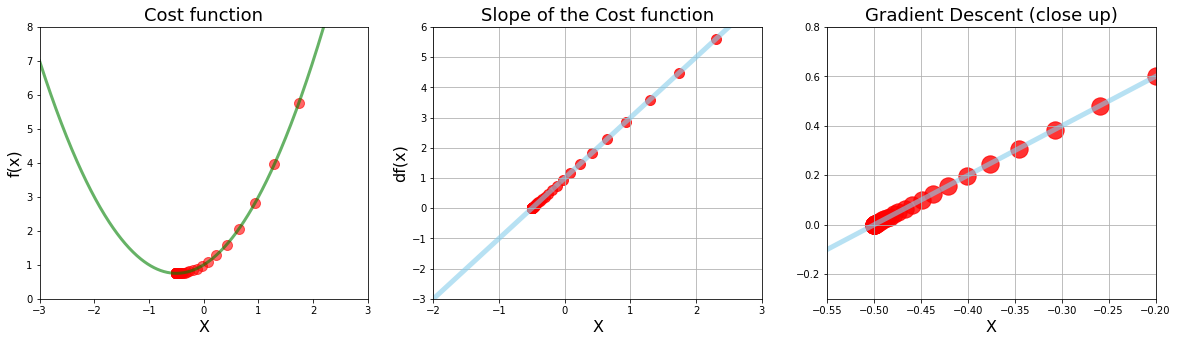

In [24]:
#The Gradient descent calculations on plot

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 3, 1) #(rows, columns, index)

plt.xlim(-3, 3)
plt.ylim(0, 8)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)

plt.plot(x1, f(x1), color='green', linewidth=3, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 3, 2)
plt.xlim(-2, 3)
plt.ylim(-3, 6)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=100,alpha=0.8)

#Chart 2: Derivative (Close up)
plt.subplot(1, 3, 3)
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)
plt.grid()
plt.title("Gradient Descent (close up)", fontsize=18)
plt.xlabel("X", fontsize=16)

plt.plot(x1, df(x1), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(x_list, slope_list, color="red", s=300,alpha=0.8)

plt.show()

##Multiple Minima Vs Initial guess

$$ g(x) = x^4 - 4x^2 + 5$$

In [25]:
#generate data using numpy

x2 = np.linspace(-2, 2, 1000)

def g(x):
  return x**4 - 4*x**2 + 5

def dg(x):
  return 4*x**3 - 8*x

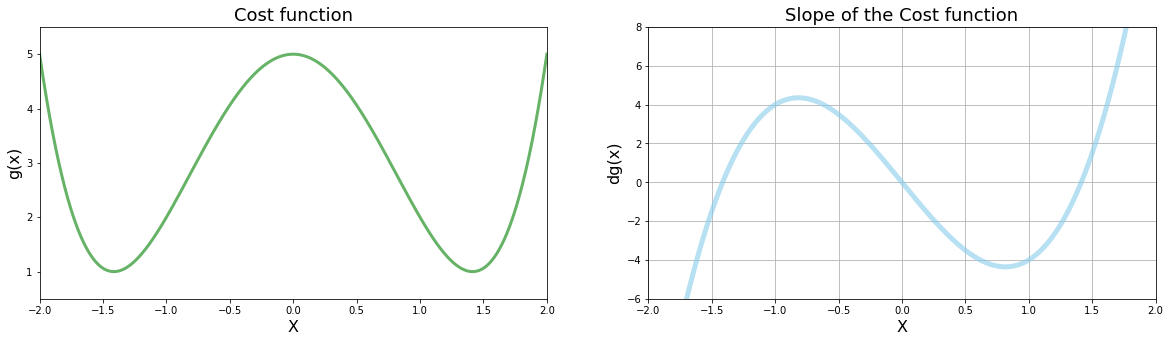

In [26]:
#The Gradient descent calculations on plot

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='green', linewidth=3, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)

plt.show()

##Gradient descent as a Python function

In [27]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, 
                     precision=0.001, max_iter=300):

  new_x = initial_guess

  x_list = [new_x]
  slope_list = [derivative_func(new_x)]

  for n in range(max_iter):
    previous_x = new_x
    gradient = derivative_func(previous_x)
    new_x = previous_x - multiplier * gradient # minus sign indicates that going steep down towards the gradient 

    step_size = abs(new_x - previous_x)

    x_list.append(new_x)
    slope_list.append(derivative_func(new_x))

    if step_size < precision:
      print("loop ran this many times:", n)
      break
  return new_x, x_list, slope_list


In [28]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  1.4122375085019094
Number of steps:  23


In [29]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess=-0.5, 
                                                 multiplier=0.02, precision=0.001)
print("Local min occurs at: ", local_min)
print("Number of steps: ", len(list_x))

loop ran this many times: 21
Local min occurs at:  -1.4122375085019094
Number of steps:  23


loop ran this many times: 28


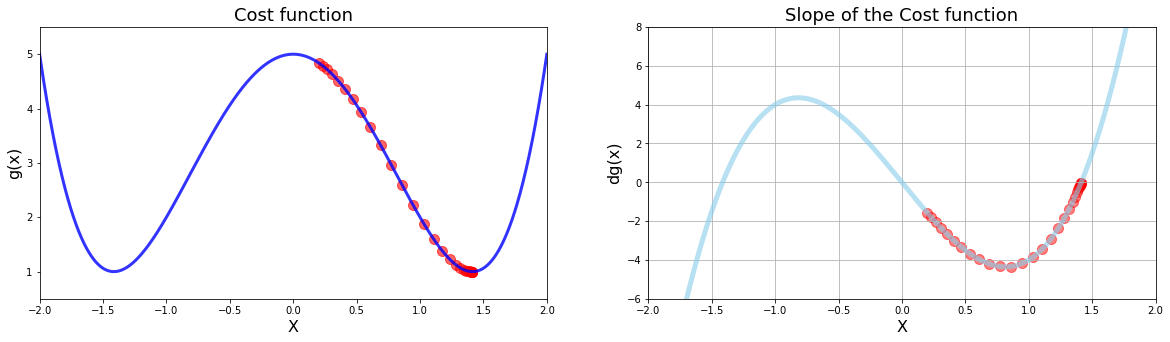

In [30]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dg, initial_guess= 0.2, 
                                                 multiplier=0.02, precision=0.001)

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of f(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

plt.plot(x2, g(x2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

#Chart 2: Derivative => plot of df(x)
plt.subplot(1, 2, 2)
plt.xlim(-2, 2)
plt.ylim(-6, 8)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)

plt.plot(x2, dg(x2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

##Divergence, Overflow and Python tuples

$$h(x) = x^5 - 2x^4 + 2$$

In [31]:
x3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
  return x**5 - 2*x**4 + 2

def dh(x):
  return 5*x**4 - 8*x**3

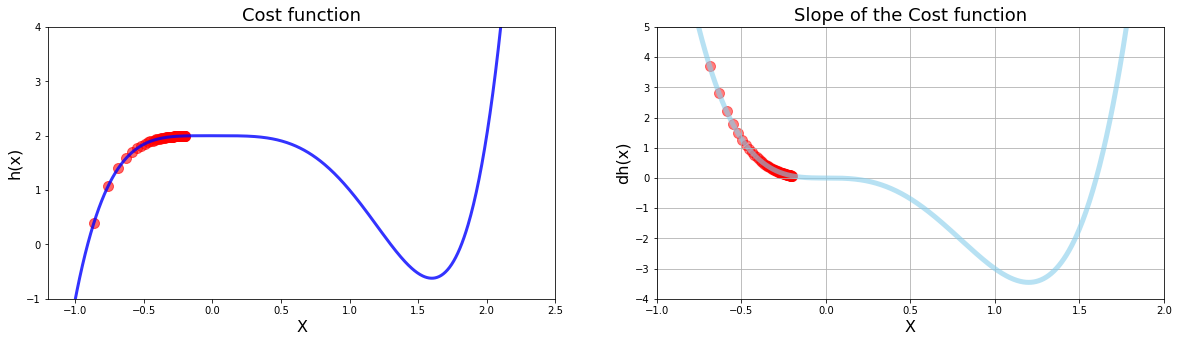

local min occurs at:  -1.8398461123332792e+24
Cost at this minimum is:  -2.1081790694225687e+121
Number of steps:  72


In [36]:
local_min,list_x,deriv_list=gradient_descent(derivative_func=dh,initial_guess= -0.2, 
                                                 max_iter=71)

plt.figure(figsize=[20,5])

#Chart 1: Cost function => plot of h(x)
plt.subplot(1, 2, 1) #(rows, columns, index)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)
plt.title("Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)

plt.plot(x3, h(x3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

#Chart 2: Derivative => plot of dh(x)
plt.subplot(1, 2, 2)
plt.xlim(-1, 2)
plt.ylim(-4, 5)
plt.grid()
plt.title("Slope of the Cost function", fontsize=18)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)

plt.plot(x3, dh(x3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print("local min occurs at: ", local_min)
print("Cost at this minimum is: ", h(local_min))
print("Number of steps: ", len(list_x))

In [35]:
import sys
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

In [37]:
#Sequence Unpacking

breakfast = ('Poori', 'Bacon', 'Brocolli')
main, side, greens = breakfast
print("Main course is ", main)

Main course is  Poori


In [38]:
data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

loop ran this many times: 115
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117
